In [45]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [46]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [47]:
len(x_train)

60000

In [48]:
len(x_test)

10000

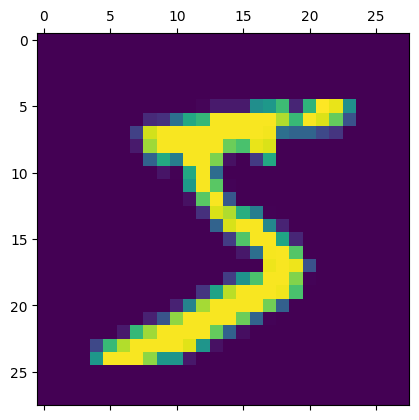

In [49]:
plt.matshow(x_train[0])

In [50]:
y_train[0]

5

**Now we will flatten our image from 2D array to 1D Array.**
in Pandas there is a function called reshape()

In [51]:
x_train.shape

(60000, 28, 28)

In [52]:
type(x_train)

numpy.ndarray

**Lets do scalling **

In [66]:
x_train = x_train/255
x_test = x_test/255

In [67]:
x_train_flattened = x_train.reshape(len(x_train), 784)
x_test_flattened = x_test.reshape(len(x_test), 784)

In [68]:
x_train_flattened.shape


(60000, 784)

In [69]:
x_test_flattened.shape

(10000, 784)

In [56]:
type(x_train_flattened)

numpy.ndarray

**Now our image is flattened and we have an 1D array. Now we need a simple NN from Keras**

In [80]:
model= keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
    ])

model.compile(
    optimizer='adam',  # Corrected spelling
    loss='sparse_categorical_crossentropy',  # Corrected spelling
    metrics=['accuracy']  # Corrected spelling
)

# Train the model
model.fit(x_train_flattened, y_train, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8124 - loss: 0.7153
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9140 - loss: 0.3092
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9207 - loss: 0.2833
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9231 - loss: 0.2726
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9262 - loss: 0.2626
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9268 - loss: 0.2590
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9285 - loss: 0.2528
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9296 - loss: 0.2545
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9299 - loss: 0.2540
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9305 - loss: 0.2465


In [81]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9150 - loss: 0.3022


[0.26848796010017395, 0.9264000058174133]

In [82]:
y_predict = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


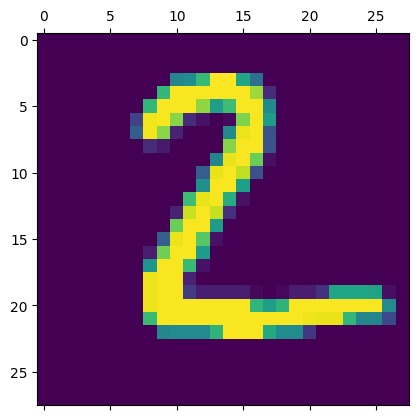

In [84]:
plt.matshow(x_test[1])

In [86]:
np.argmax(y_predict[1])

2

In [87]:
tf.math.confusion_matrix(labels=y_test, predictions=np.argmax(y_predict, axis=1))

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   8,    8,  916,   18,    9,    4,   12,   13,   42,    2],
       [   5,    0,   15,  919,    0,   27,    2,   12,   25,    5],
       [   1,    1,    4,    2,  923,    0,   10,    5,   10,   26],
       [  10,    2,    1,   33,   10,  781,   13,    9,   28,    5],
       [  14,    3,    5,    1,    7,   13,  912,    1,    2,    0],
       [   2,    6,   21,    3,    6,    1,    0,  965,    4,   20],
       [   9,    6,    6,   18,    9,   25,   10,   14,  872,    5],
       [  11,    7,    1,   10,   29,    6,    0,   35,    7,  903]],
      dtype=int32)>

<Axes: >

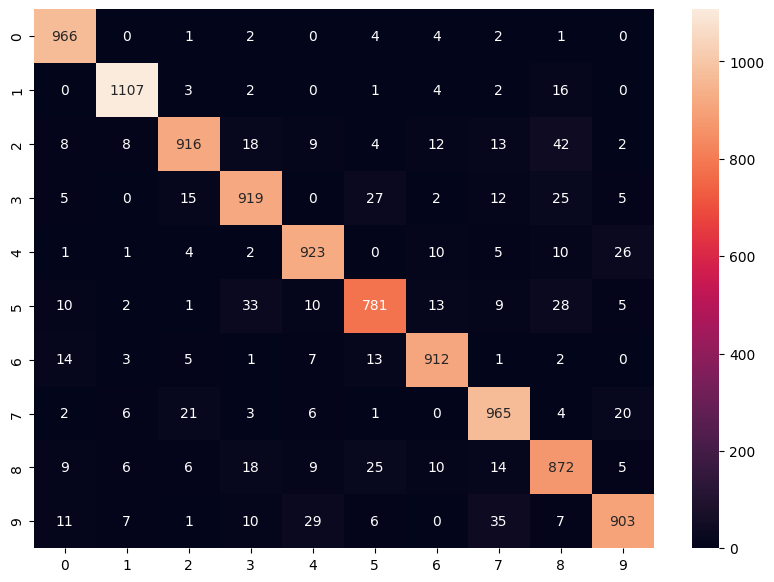

In [88]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(tf.math.confusion_matrix(labels=y_test, predictions=np.argmax(y_predict, axis=1)), annot=True, fmt='d')

**Addind Hidden Layers**

In [90]:
model= keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train_flattened, y_train, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8709 - loss: 0.4520
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9623 - loss: 0.1272
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9741 - loss: 0.0872
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9804 - loss: 0.0655
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9850 - loss: 0.0507
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9883 - loss: 0.0396
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9888 - loss: 0.0361
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9919 - loss: 0.0272
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9930 - loss: 0.0217
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9946 - loss: 0.0179


In [91]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9706 - loss: 0.1051


[0.08834771811962128, 0.9753999710083008]

In [92]:
tf.math.confusion_matrix(labels=y_test, predictions=np.argmax(y_predict, axis=1))

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   8,    8,  916,   18,    9,    4,   12,   13,   42,    2],
       [   5,    0,   15,  919,    0,   27,    2,   12,   25,    5],
       [   1,    1,    4,    2,  923,    0,   10,    5,   10,   26],
       [  10,    2,    1,   33,   10,  781,   13,    9,   28,    5],
       [  14,    3,    5,    1,    7,   13,  912,    1,    2,    0],
       [   2,    6,   21,    3,    6,    1,    0,  965,    4,   20],
       [   9,    6,    6,   18,    9,   25,   10,   14,  872,    5],
       [  11,    7,    1,   10,   29,    6,    0,   35,    7,  903]],
      dtype=int32)>

<Axes: >

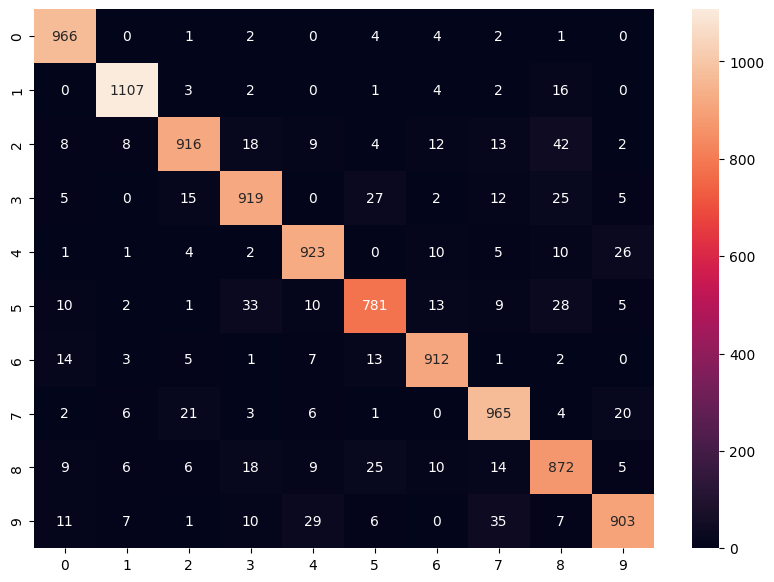

In [93]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(tf.math.confusion_matrix(labels=y_test, predictions=np.argmax(y_predict, axis=1)), annot=True, fmt='d')

**Keras have its own function flatten**

In [94]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    ])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8749 - loss: 0.4531
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9593 - loss: 0.1365
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9725 - loss: 0.0912
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9799 - loss: 0.0649
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9852 - loss: 0.0497
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9874 - loss: 0.0409
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9908 - loss: 0.0321
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9923 - loss: 0.0263
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9938 - loss: 0.0215
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9953 - loss: 0.0175
